In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as ltb
from xgboost import XGBRegressor
from skopt import BayesSearchCV
from skopt.space import Integer, Real

In [2]:
X_test = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_COPD")
X_train = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_COPD")
y_test = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_COPD")
y_train = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_COPD")
X_train.head()

,CensusTract,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
0,36005028300,8.207399,41.259739,1.555283,41.949118,0.676922,12123.662924,0.683718,0.090400,0.854318,38.373136,-0.386759
1,48199030502,9.144655,34.335341,0.343069,43.134223,0.576596,404.739135,0.080421,0.024975,0.693101,0.063615,-0.431843
2,6037502802,13.101030,48.633248,0.724939,42.503083,0.615856,2252.337598,0.089032,0.448494,5.611384,25.207062,3.139540
3,27111960500,5.792458,37.417531,0.089389,15.512694,0.188858,5.973026,0.237135,0.793861,1.403404,0.894152,-0.434220
4,12023110300,7.853292,32.783956,0.139550,36.392127,0.541289,49.769950,0.205468,0.016073,0.759205,0.236432,-0.434220


In [3]:
# Re-indexing
X_test.set_index("CensusTract", inplace=True)
X_train.set_index("CensusTract", inplace=True)

In [4]:
print(X_test.shape, y_test.shape, y_train.shape)

(18081, 11) (18081, 2) (54242, 2)


In [5]:
y_test.head()

,CensusTract,COPD_prevalence
0,36061015200,4.0
1,19075960100,6.3
2,34005700402,6.1
3,17031030702,4.0
4,16083000200,6.6


In [6]:
y_test.set_index("CensusTract", inplace=True)
y_train.set_index("CensusTract", inplace=True)

In [7]:
y_test = np.array(y_test)
y_test = y_test.reshape(18081,)
y_train = np.array(y_train)
y_train = y_train.reshape(54242,)
print(X_train.shape, X_test.shape, y_test.shape, y_train.shape)


(54242, 11) (18081, 11) (18081,) (54242,)


In [8]:
X_test.head()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,
36061015200,8.508460,40.304332,2.024547,46.728128,0.784047,11401.773089,0.307541,0.218125,0.519059,190.269234,2.047370e+01
19075960100,7.803056,41.558372,0.150554,18.311599,0.227515,37.992555,0.519982,0.038523,1.808481,0.069894,3.981939e-09
34005700402,9.100512,44.520733,0.638723,31.684511,0.426954,77.407655,0.682397,0.510151,0.895195,4.146678,1.024311e-03
17031030702,9.059056,47.181754,0.879685,34.821936,0.484907,4149.799477,0.121217,0.029199,0.516243,7.102483,0.000000e+00
16083000200,7.709288,47.424626,0.156040,19.612370,0.266110,232.317666,0.235265,0.007823,1.248887,0.326440,5.720643e-05


### Multiple OLS in the EDA notebook found no reasonable correlation. 

### Random Forest Regressor with default values.

In [9]:
# Instantiating RandomForestRegressor with default values
rf = RandomForestRegressor() 
rf.fit(X_train, y_train)

RandomForestRegressor()

In [10]:
y_pred = rf.predict(X_test)

In [11]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.563670182356953
MAE: 1.2704598197002377
MSE: 3.012193290747193
RMSE: 1.7355671380696263


### This R<sup>2</sup> score is mediocre. Tuning hyperparameters next.

In [13]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': range(1, 30),
                                        'n_estimators': range(1, 500)})

In [14]:
rs.best_estimator_

RandomForestRegressor(max_depth=26, n_estimators=244)

In [15]:
y_pred = rs.predict(X_test)

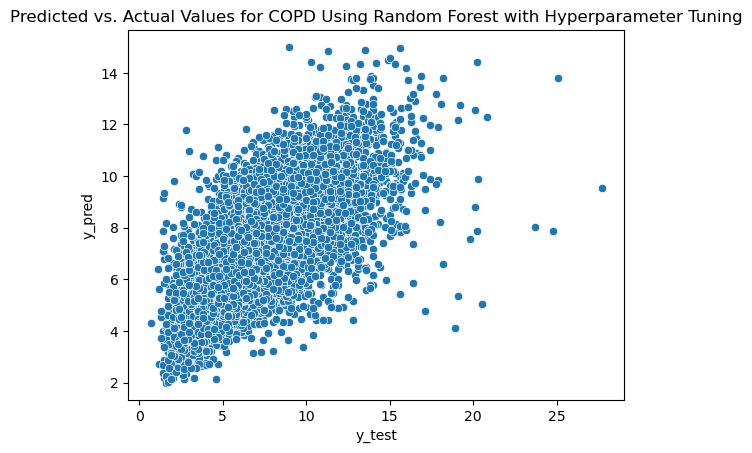

In [16]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title("Predicted vs. Actual Values for COPD Using Random Forest with Hyperparameter Tuning")
_ = ax.set_xlabel("y_test")
_ = ax.set_ylabel("y_pred")

In [17]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5652447290420419
MAE: 1.2666868643907163
MSE: 3.0013234423687054
RMSE: 1.7324328103475486


### The R<sup>2</sup> score barely changed. Now tuning hyperparameters via Bayesian search

In [9]:
opt = BayesSearchCV(RandomForestRegressor(), {"n_estimators":Integer(2,500), "max_depth":Integer(1,30)})
_ = opt.fit(X_train, y_train)

/Users/butler/anaconda3/envs/bayesian/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


KeyboardInterrupt: 

In [19]:
opt.best_estimator_

RandomForestRegressor(max_depth=29, n_estimators=500)

In [ ]:
y_pred = opt.predict(X_test)

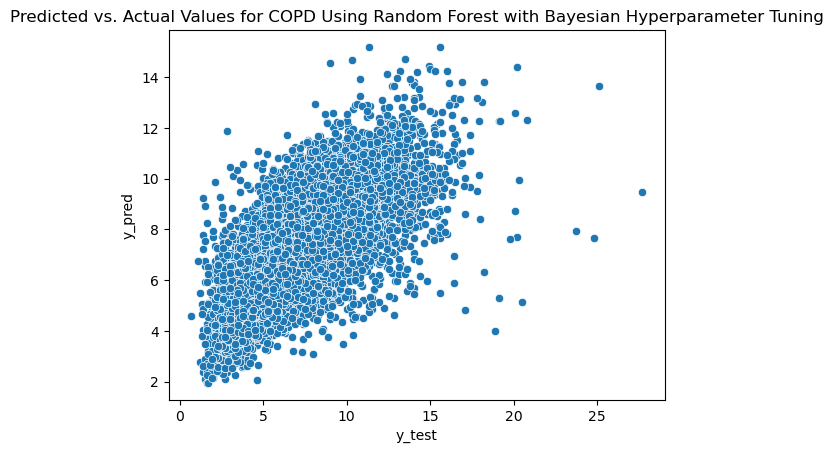

In [21]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title("Predicted vs. Actual Values for COPD Using Random Forest with Bayesian Hyperparameter Tuning")
_ = ax.set_xlabel("y_test")
_ = ax.set_ylabel("y_pred")

In [22]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5682361759116121
MAE: 1.2627652008873123
MSE: 2.9806720547582493
RMSE: 1.7264622946239658


### Since the hyperparameters given by the Bayesian search are at or close to the maximum range given, it may be helpful to start with different ranges.

In [9]:
opt = BayesSearchCV(RandomForestRegressor(), {"n_estimators":Integer(500,700), "max_depth":Integer(25,45)})
_ = opt.fit(X_train, y_train)

/Users/butler/anaconda3/envs/bayesian/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/butler/anaconda3/envs/bayesian/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/butler/anaconda3/envs/bayesian/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/butler/anaconda3/envs/bayesian/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/butler/anaconda3/envs/bayesian/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The obj

In [10]:
opt.best_estimator_

RandomForestRegressor(max_depth=36, n_estimators=600)

In [11]:
y_pred = opt.predict(X_test)

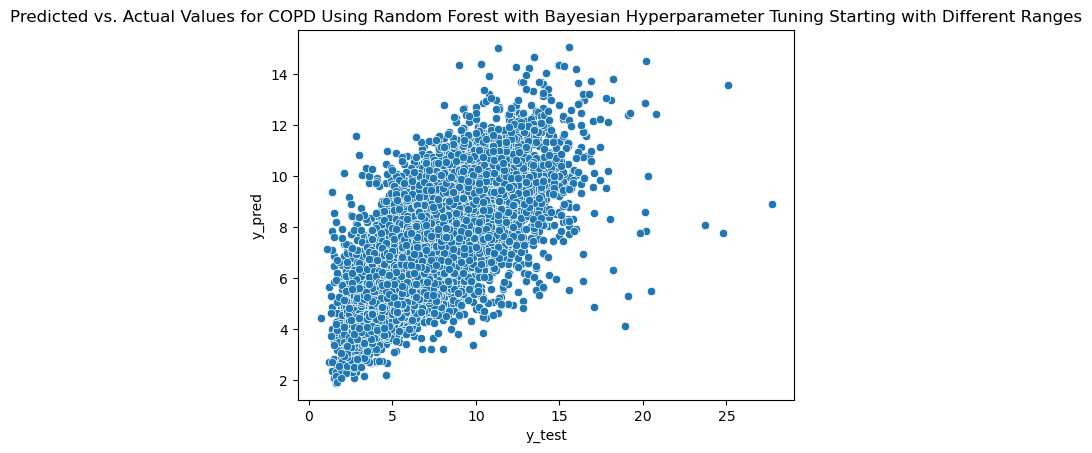

In [12]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title("Predicted vs. Actual Values for COPD Using Random Forest with Bayesian Hyperparameter Tuning Starting with Different Ranges")
_ = ax.set_xlabel("y_test")
_ = ax.set_ylabel("y_pred")

In [13]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5683420534211803
MAE: 1.2620712194856953
MSE: 2.9799411317017297
RMSE: 1.726250599334213


### This model is not quite as good as the random forest one using hyperparameters optimized by randomized searching.

### AdaBoost Regressor

In [23]:
# Instantiating AdaBoostRegressor with default parameters

ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

AdaBoostRegressor()

In [24]:
y_pred = ada.predict(X_test)

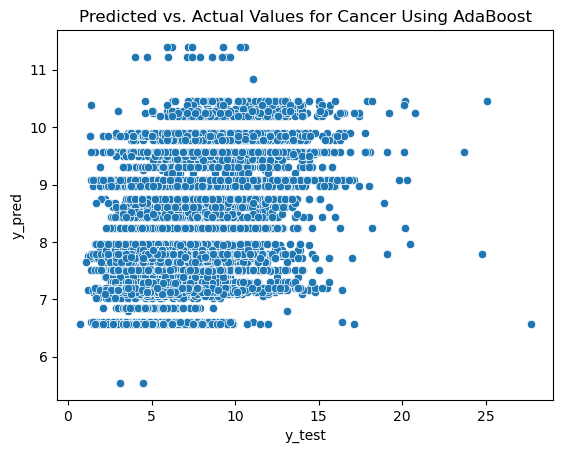

In [25]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title("Predicted vs. Actual Values for Cancer Using AdaBoost")
_ = ax.set_xlabel("y_test")
_ = ax.set_ylabel("y_pred")

In [26]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -0.09016747967314265
MAE: 2.294220594988374
MSE: 7.525947197009182
RMSE: 2.7433459856549596


### With a negative R<sup>2</sup> value, this is a horrible model.

### Now with tuned hyperparameters via randomized search.

In [27]:
# Instantiating AdaBoost Regressor and randomly searching for best hyperparameters n_estimators and learning rate

ada = AdaBoostRegressor()
params = {"n_estimators": range(1,500), "learning_rate":np.arange(1e-3,100)}

rs = RandomizedSearchCV(ada, params)

In [28]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': array([1.0000e-03, 1.0010e+00, 2.0010e+00, 3.0010e+00, 4.0010e+00,
       5.0010e+00, 6.0010e+00, 7.0010e+00, 8.0010e+00, 9.0010e+00,
       1.0001e+01, 1.1001e+01, 1.2001e+01, 1.3001e+01, 1.4001e+01,
       1.5001e+01, 1.6001e+01, 1.7001e+01, 1.8001e+01, 1.9001e+01,
       2.0001e+01, 2.1001e+01, 2.2001e+01, 2.30...
       7.0001e+01, 7.1001e+01, 7.2001e+01, 7.3001e+01, 7.4001e+01,
       7.5001e+01, 7.6001e+01, 7.7001e+01, 7.8001e+01, 7.9001e+01,
       8.0001e+01, 8.1001e+01, 8.2001e+01, 8.3001e+01, 8.4001e+01,
       8.5001e+01, 8.6001e+01, 8.7001e+01, 8.8001e+01, 8.9001e+01,
       9.0001e+01, 9.1001e+01, 9.2001e+01, 9.3001e+01, 9.4001e+01,
       9.5001e+01, 9.6001e+01, 9.7001e+01, 9.8001e+01, 9.9001e+01]),
                                        'n_estimators': range(1, 500)})

In [29]:
rs.best_estimator_

AdaBoostRegressor(learning_rate=10.000999999999998, n_estimators=398)

In [30]:
y_pred = rs.predict(X_test)

In [31]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: -29.751863446013132
MAE: 14.299894591397535
MSE: 212.29481232894761
RMSE: 14.57034015831297


### Changing the parameters made the results worse. 

### Gradient Boost Regressor

In [32]:
# Instantiating GradientBoostRegressor with default parameters

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [33]:
y_pred = gb.predict(X_test)

In [34]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.39011964743370897
MAE: 1.5564373268809988
MSE: 4.210295588053512
RMSE: 2.0519004820052826


### This is not as good as random forest

### Now with tuned hyperparameters via randomized search.

In [35]:
# Instantiating GradientBoost and using randomized searching for best hyperparameters n_estimators and learning rate

gb = GradientBoostingRegressor()
params = {"n_estimators": range(1,500), "max_leaf_nodes": range(2,100), "learning_rate": np.arange(0.01, 1)}

rs = RandomizedSearchCV(gb, params)

In [36]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': array([0.01]),
                                        'max_leaf_nodes': range(2, 100),
                                        'n_estimators': range(1, 500)})

In [37]:
rs.best_estimator_

GradientBoostingRegressor(learning_rate=0.01, max_leaf_nodes=49,
                          n_estimators=406)

In [38]:
y_pred = rs.predict(X_test)

In [39]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.3417220274132181
MAE: 1.6150242803307446
MSE: 4.544407492441208
RMSE: 2.1317615937156784


### Using the tuned hyperparameters gave a worse R<sup>2</sup> value.

### XGBoost Regressor

In [40]:
# Instantiating XGBoost with default parameters

xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [41]:
y_pred = xgb.predict(X_test)

In [42]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5142599861116262
MAE: 1.355337692840616
MSE: 3.353295492812221
RMSE: 1.8312005605100226


### This model is still not as good as Random Forest.

### Now with tuned hyperparameters via randomized search.

In [43]:
# Instantiating XGBRegressor Regressor and randomly searching for best hyperparameters max_depth, min_child_weight, and gamma.
xgb = XGBRegressor()
params = {"max_depth": range(1,200), "min_child_weight":range(1,200), "gamma":range(1,200)}

rs = RandomizedSearchCV(xgb, params)

In [44]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,...ne,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'gamma': range(1, 200),
                                        'max_depth': range(1, 200),
                                        'min_child_weight': range(1, 200)})

In [45]:
rs.best_params_

{'min_child_weight': 136, 'max_depth': 20, 'gamma': 37}

In [46]:
y_pred = rs.predict(X_test)

In [47]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5183552873030648
MAE: 1.3472932362370533
MSE: 3.325023671190963
RMSE: 1.8234647436106253


### This is slightly better than XGBoost without the tuned  hyperparameters, but it is still not as good as Random Forest. 

### Now tuning hyperparameters via Bayesian search

In [48]:
opt = BayesSearchCV(XGBRegressor(), {"max_depth":Integer(1,200), "min_child_weight":Integer(1,200), "gamma":Integer(1,200)})
_ = opt.fit(X_train, y_train)

In [49]:
opt.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=55, max_leaves=None,
             min_child_weight=114, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [50]:
y_pred = opt.predict(X_test)

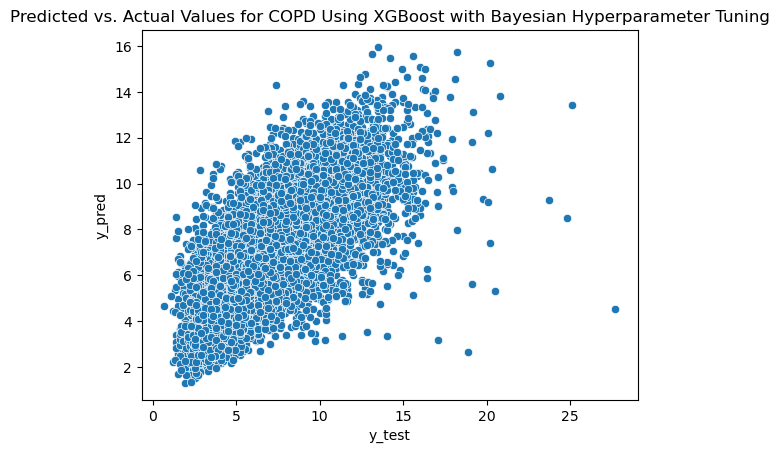

In [51]:
ax = sns.scatterplot(x=y_test, y=y_pred)
_ = ax.set_title("Predicted vs. Actual Values for COPD Using XGBoost with Bayesian Hyperparameter Tuning")
_ = ax.set_xlabel("y_test")
_ = ax.set_ylabel("y_pred")

In [52]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5427976827240983
MAE: 1.3083258027662765
MSE: 3.1562861324760205
RMSE: 1.7765939695034487


### This is about the same as using the hyperparameters tuned via randomized search. 

### LightGBM Regressor

In [53]:
# Instantiating LGBMRegressor and randomly searching for best hyperparameters reg_alpha and reg_lambda

lgbm = ltb.LGBMRegressor()
params = {"reg_alpha": np.arange(1e-3,100), "reg_lambda": np.arange(1e-3,100)}

rs = RandomizedSearchCV(lgbm, params)

In [54]:
rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=LGBMRegressor(),
                   param_distributions={'reg_alpha': array([1.0000e-03, 1.0010e+00, 2.0010e+00, 3.0010e+00, 4.0010e+00,
       5.0010e+00, 6.0010e+00, 7.0010e+00, 8.0010e+00, 9.0010e+00,
       1.0001e+01, 1.1001e+01, 1.2001e+01, 1.3001e+01, 1.4001e+01,
       1.5001e+01, 1.6001e+01, 1.7001e+01, 1.8001e+01, 1.9001e+01,
       2.0001e+01, 2.1001e+01, 2.2001e+01, 2.3001e+01, 2...
       6.5001e+01, 6.6001e+01, 6.7001e+01, 6.8001e+01, 6.9001e+01,
       7.0001e+01, 7.1001e+01, 7.2001e+01, 7.3001e+01, 7.4001e+01,
       7.5001e+01, 7.6001e+01, 7.7001e+01, 7.8001e+01, 7.9001e+01,
       8.0001e+01, 8.1001e+01, 8.2001e+01, 8.3001e+01, 8.4001e+01,
       8.5001e+01, 8.6001e+01, 8.7001e+01, 8.8001e+01, 8.9001e+01,
       9.0001e+01, 9.1001e+01, 9.2001e+01, 9.3001e+01, 9.4001e+01,
       9.5001e+01, 9.6001e+01, 9.7001e+01, 9.8001e+01, 9.9001e+01])})

In [55]:
y_pred = rs.predict(X_test)

In [56]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.49180023059655986
MAE: 1.3912264436130484
MSE: 3.508345920582094
RMSE: 1.8730579063611712


In [57]:
rs.best_estimator_

LGBMRegressor(reg_alpha=34.00099999999999, reg_lambda=1.001)

### Now tuning hyperparameters via Bayesian search

In [58]:
# Instantiating Bayesian search using LightGBM 

opt = BayesSearchCV(ltb.LGBMRegressor(), {"reg_alpha": Real(1e-3,100), "reg_lambda": Real(1e-3,100)})
_ = opt.fit(X_train, y_train)

/Users/butler/anaconda3/envs/bayesian/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/butler/anaconda3/envs/bayesian/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/butler/anaconda3/envs/bayesian/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/butler/anaconda3/envs/bayesian/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/butler/anaconda3/envs/bayesian/lib/python3.9/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The obj

In [59]:
y_pred = opt.predict(X_test)

In [60]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.5007157467468194
MAE: 1.3800729482629466
MSE: 3.4467978511046837
RMSE: 1.8565553724854758


In [61]:
opt.best_estimator_

LGBMRegressor(reg_alpha=6.000583314768741, reg_lambda=0.001)

### Not as good as the previous model. 

### Support vector machine requires normalized data.

In [62]:
# Importing normalized data

X_test_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_log_CHD")
X_train_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_log_CHD")
y_test_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_log_CHD")
y_train_log = pd.read_csv("/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_log_CHD")
X_train_log.head()

,CensusTract,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF
0,37119005710,8.912780,45.768431,0.388568,0.821299,0.752917,-0.753897,-1.327812,0.333528,0.097563,-0.335776
1,1097000902,9.035270,37.165639,1.322447,1.095497,1.601663,0.479179,1.667931,-0.765165,1.278073,0.482143
2,1003011000,8.335965,37.130640,-0.814455,0.501502,0.560153,-0.810621,-0.977673,-0.924906,0.120130,-1.176304
3,32009950100,4.916514,47.542125,-2.264089,-2.349832,-2.014681,-1.115054,-0.010846,-1.381932,0.010977,-1.327763
4,18163010403,9.101922,45.838566,-0.060140,-0.092519,-0.268074,0.076039,0.334889,0.497366,0.404443,-0.554687


### Support Vector Machine Regressor with tuned parameters via randomized search

In [63]:
# Instantiating support vector machine regressor and randomly searching for best hyperparameters C and epsilon.

svm = SVR()
params = {"C": np.arange(.01,10), "epsilon":np.arange(1e-4,10)}

svm_rs = RandomizedSearchCV(svm, params)

In [64]:
svm_rs.fit(X_train, y_train)

RandomizedSearchCV(estimator=SVR(),
                   param_distributions={'C': array([0.01, 1.01, 2.01, 3.01, 4.01, 5.01, 6.01, 7.01, 8.01, 9.01]),
                                        'epsilon': array([1.0000e-04, 1.0001e+00, 2.0001e+00, 3.0001e+00, 4.0001e+00,
       5.0001e+00, 6.0001e+00, 7.0001e+00, 8.0001e+00, 9.0001e+00])})

In [65]:
svm_rs.best_estimator_

SVR(C=8.01, epsilon=3.0001)

In [66]:
# Instantiating support vector machine regressor using best hyperparameters from randomized search

svm = SVR(C=5.150003902430793, epsilon=2.184783042590056)
svm.fit(X_train, y_train)

SVR(C=5.150003902430793, epsilon=2.184783042590056)

In [67]:
y_pred = svm_rs.predict(X_test)

In [68]:
print("R2 score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 score: 0.07259627905187893
MAE: 1.9988671166757586
MSE: 6.402311171727522
RMSE: 2.5302788723236658


### The R<sup>2</sup> score indicates that SVM regression is not a good model for this data.

## Random forest with hyperparameter tuning gave the best R<sup>2</sup> value. However, even this is not a high enough correlation for random forest to be a reasonable model.